#### authors: Rafael Dousse, Eva Ray, Massimo Stefani

# Exercise 2 - Optional - Classification on MNIST

Using the SciKit Learn toolkit, train a multi-class logistic regression on the MNIST problem and compare the performances with the KNN of PW2.

For the “daring” ones, implement a multi-class version based on your own implementation and run it against MNIST data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
train = pd.read_csv('mnist_train.csv')
X_train = train.drop('label', axis=1).values.reshape(-1,28,28)
y_train = train['label'].values

test = pd.read_csv('mnist_test.csv')
X_test = test.drop('label', axis=1).values.reshape(-1,28,28)
y_test = test['label'].values

In [3]:
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (60000, 28, 28)
Training labels shape:  (60000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)


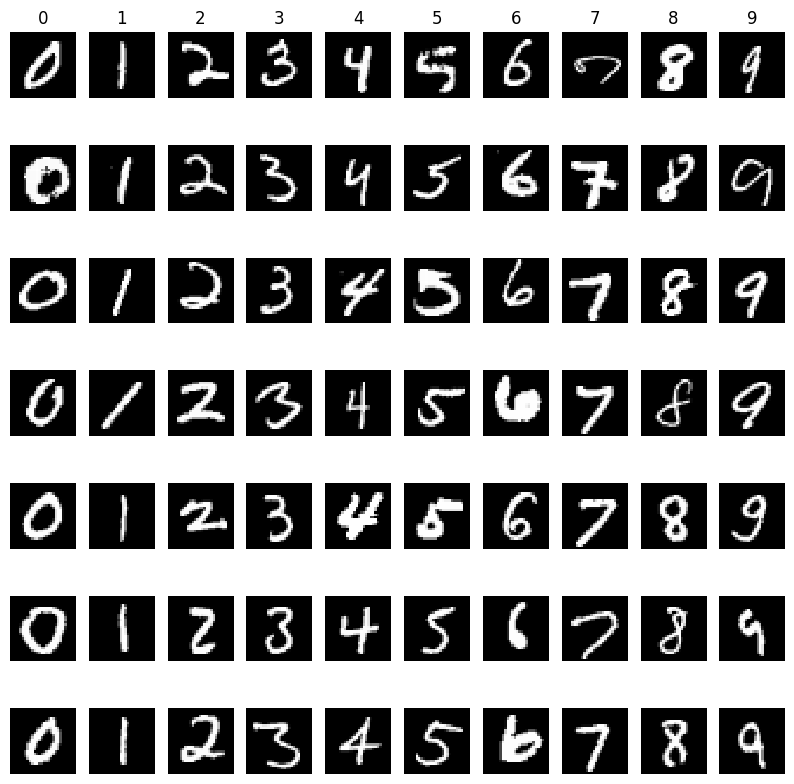

In [4]:
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes): # y and cls takes values from 0-9
    idxs = np.flatnonzero(y_train == y) # gets the indices of samples that corresponds to class y
    idxs = np.random.choice(idxs, samples_per_class, replace=False) # picks randomly samples_per_class indices
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1   # determines the sub-plot index
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import StandardScaler

In [6]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)
print("Données normalisées et aplaties :")
print("X_train_scaled :", X_train_scaled.shape)
print("X_test_scaled  :", X_test_scaled.shape)

Données normalisées et aplaties :
X_train_scaled : (60000, 784)
X_test_scaled  : (10000, 784)


In [45]:
X_sub, _, y_sub, _ = train_test_split(X_train_scaled, y_train, stratify=y_train, random_state=42)

In [73]:
model = OneVsRestClassifier(estimator=LogisticRegression(max_iter=200))
# model = LogisticRegression(max_iter=200)

We implemented the One-vs-Rest (OvR) scheme for multi-class classification, aligning with the methodology presented in the course material. This strategy trains ten independent binary Logistic Regression models (one for each digit versus all others). However the Multinomial (Softmax) approach is apparently recommended by the scikit-learn documentation (LogisticRegression()).
(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [74]:
model.fit(X_sub, y_sub)

,estimator,LogisticRegre...(max_iter=200)
,n_jobs,None
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None


In [75]:
y_pred = model.predict(X_test_scaled)

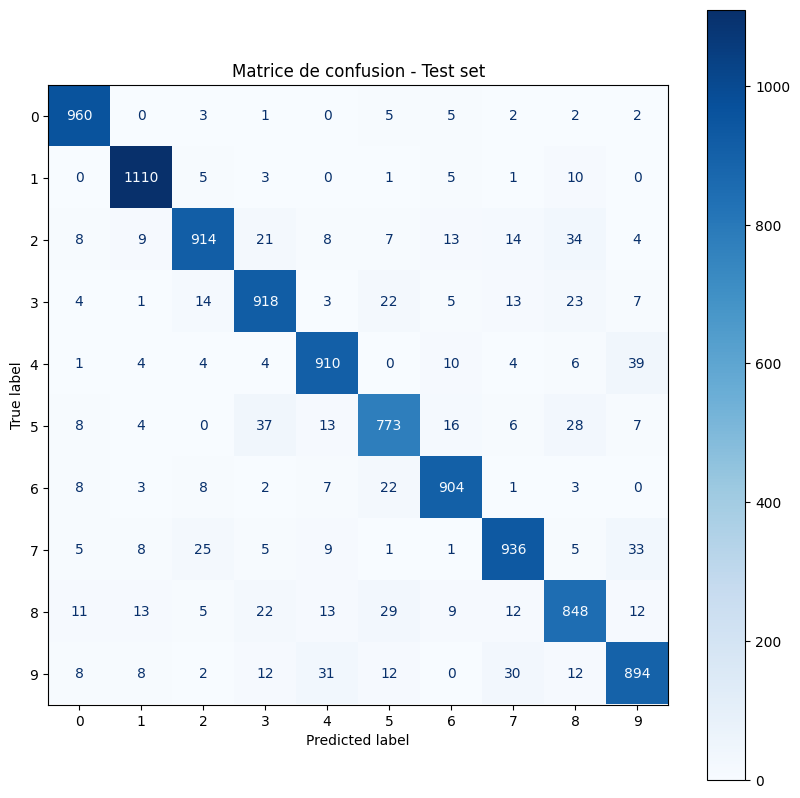

In [76]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matrice de confusion - Test set')
plt.show()

In [77]:
acc_test = accuracy_score(y_test, y_pred)
print(f"Accuracy sur le jeu de test : {acc_test:.4f}")

Accuracy sur le jeu de test : 0.9167


Number of good predictions: 9167
Number of wrong predictions: 833


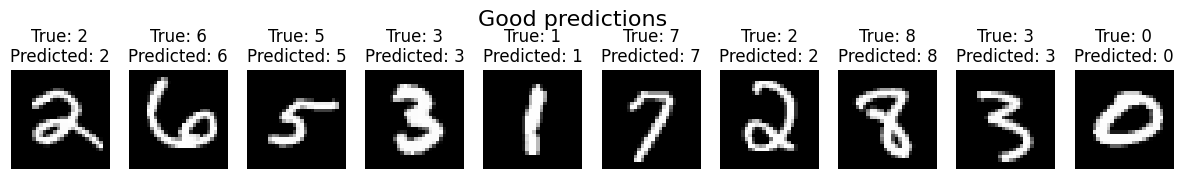

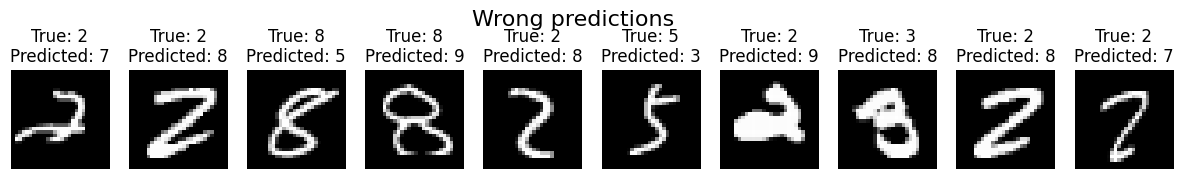

In [78]:
import random

correct_idxs = np.where(y_pred == y_test)[0]
wrong_idxs = np.where(y_pred != y_test)[0]

print(f"Number of good predictions: {len(correct_idxs)}")
print(f"Number of wrong predictions: {len(wrong_idxs)}")

n_display = 10

plt.figure(figsize=(15, 4))
for i, idx in enumerate(random.sample(list(correct_idxs), n_display)):
    plt.subplot(2, n_display, i + 1)
    plt.imshow(X_test[idx].astype('uint8'))
    plt.title(f"True: {y_test[idx]}\nPredicted: {y_pred[idx]}")
    plt.axis('off')
plt.suptitle("Good predictions", fontsize=16)
plt.show()

# Affichage des mal prédites
plt.figure(figsize=(15, 4))
for i, idx in enumerate(random.sample(list(wrong_idxs), n_display)):
    plt.subplot(2, n_display, i + 1)
    plt.imshow(X_test[idx].astype('uint8'))
    plt.title(f"True: {y_test[idx]}\nPredicted: {y_pred[idx]}")
    plt.axis('off')
plt.suptitle("Wrong predictions", fontsize=16)
plt.show()
